<a href="https://colab.research.google.com/github/ArsheenSingh/Personal-Python-Projects/blob/main/Delhi_Housing_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/House Price prediction delhi/Delhi_v2.csv')

In [ ]:
data

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [ ]:
data.dropna(inplace=True)

In [ ]:
data= data.drop(['Address', 'Landmarks','desc'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 10 to 7709
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        329 non-null    int64  
 1   price             329 non-null    float64
 2   area              329 non-null    float64
 3   latitude          329 non-null    float64
 4   longitude         329 non-null    float64
 5   Bedrooms          329 non-null    float64
 6   Bathrooms         329 non-null    float64
 7   Balcony           329 non-null    float64
 8   Status            329 non-null    object 
 9   neworold          329 non-null    object 
 10  parking           329 non-null    float64
 11  Furnished_status  329 non-null    object 
 12  Lift              329 non-null    float64
 13  type_of_building  329 non-null    object 
 14  Price_sqft        329 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 41.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('price',axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
train_data=x_train.join(y_train)
train_data

,Unnamed: 0,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,price
966,966,1500.0,28.677789,77.080203,3.0,2.0,1.0,Ready to Move,Resale,2.0,Unfurnished,2.0,Flat,7333.333333,11000000.0
4745,4745,720.0,28.484771,77.028653,2.0,2.0,1.0,Ready to Move,Resale,2.0,Semi-Furnished,1.0,Flat,5555.555556,4000000.0
140,140,1065.0,28.633503,77.431595,2.0,2.0,3.0,Ready to Move,Resale,2.0,Semi-Furnished,3.0,Flat,4882.629108,5200000.0
184,184,1250.0,28.686543,77.299599,3.0,2.0,2.0,Ready to Move,Resale,2.0,Semi-Furnished,1.0,Flat,6000.000000,7500000.0
4611,4611,600.0,28.478140,77.001784,2.0,2.0,1.0,Ready to Move,Resale,1.0,Furnished,1.0,Flat,5000.000000,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,4816,805.0,28.634644,77.049034,3.0,2.0,2.0,Ready to Move,New Property,1.0,Semi-Furnished,1.0,Flat,4968.944099,4000000.0
811,811,900.0,28.561350,77.243301,2.0,2.0,2.0,Ready to Move,Resale,1.0,Semi-Furnished,0.0,Flat,9666.666667,8700000.0
2083,2083,1658.0,28.609978,77.211678,3.0,4.0,2.0,Ready to Move,Resale,2.0,Semi-Furnished,1.0,Flat,10554.885404,17500000.0
6788,6788,750.0,28.616474,77.056068,3.0,2.0,1.0,Ready to Move,New Property,1.0,Semi-Furnished,1.0,Flat,5200.000000,3900000.0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Balcony'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'Lift'}>],
       [<Axes: title={'center': 'Price_sqft'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

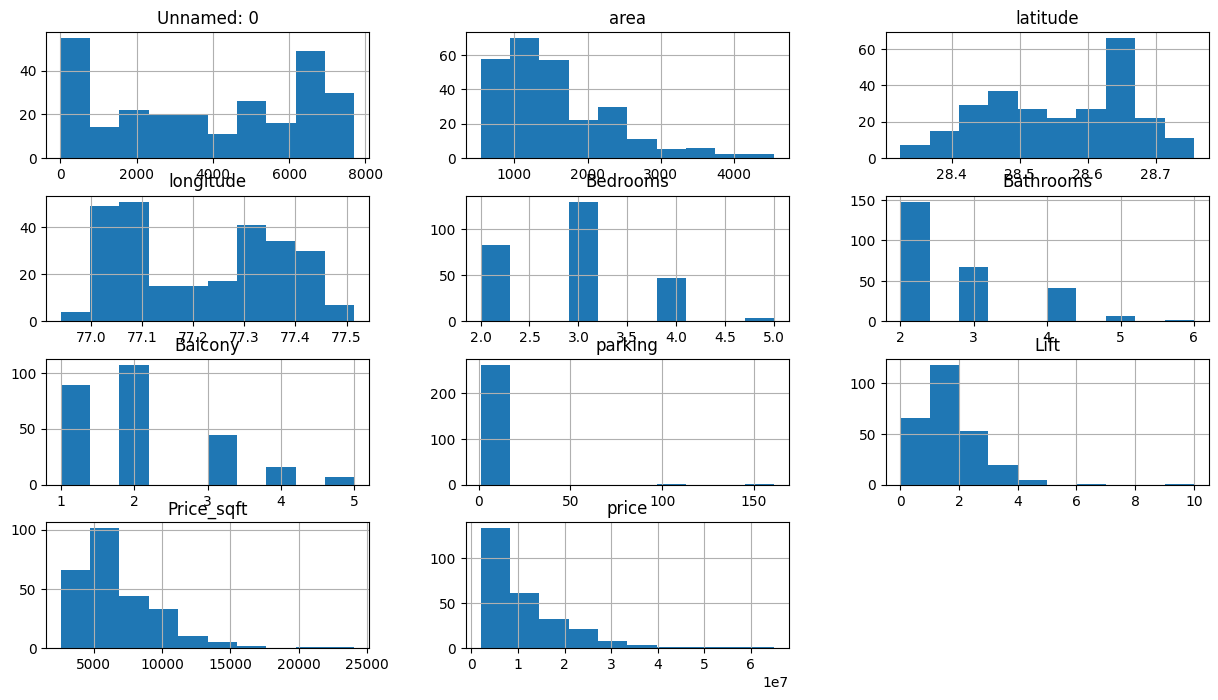

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
#removing skweeness
train_data['area']=np.log(train_data['area']+1)
train_data['price']=np.log(train_data['price']+1)
train_data['Bedrooms']=np.log(train_data['Bedrooms']+1)
train_data['Bathrooms']=np.log(train_data['Bathrooms']+1)
train_data['Price_sqft']=np.log(train_data['Price_sqft']+1)


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Balcony'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'Lift'}>],
       [<Axes: title={'center': 'Price_sqft'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

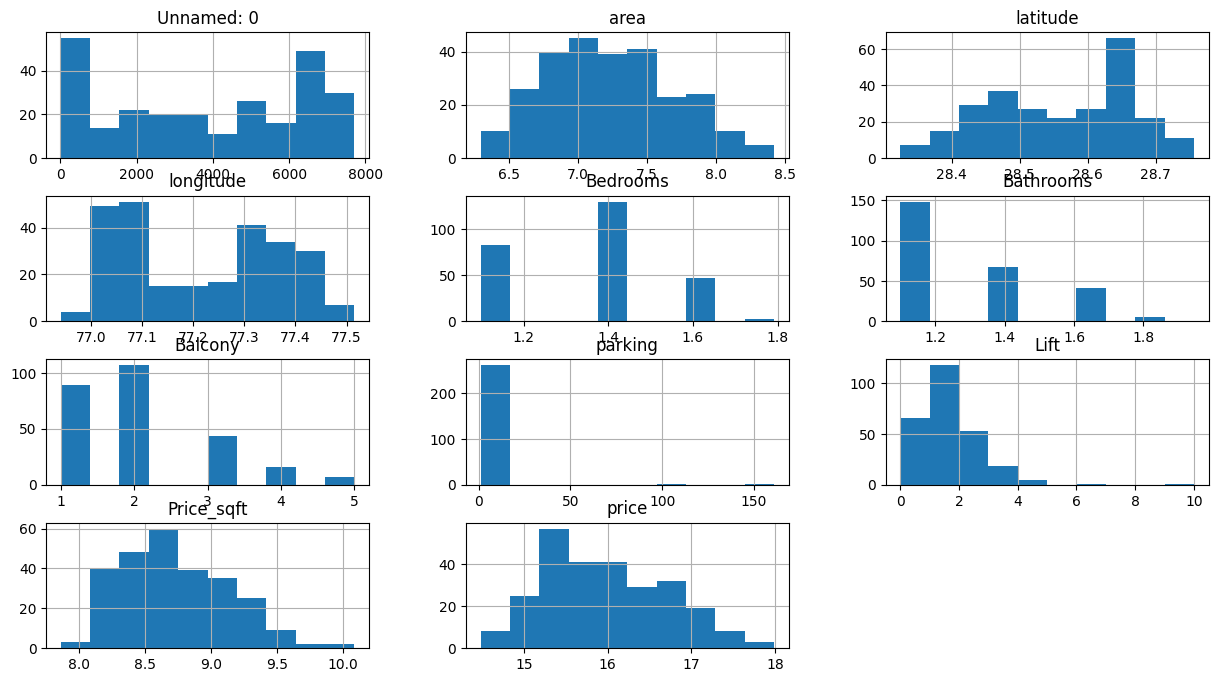

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.Furnished_status)).drop('Furnished_status', axis=1)
train_data = train_data.join(pd.get_dummies(train_data.type_of_building)).drop('type_of_building', axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Status)).drop('Status', axis=1)
train_data = train_data.join(pd.get_dummies(train_data.neworold)).drop('neworold', axis=1)


In [ ]:
train_data

,Unnamed: 0,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft,price,Furnished,Semi-Furnished,Unfurnished,Flat,Individual House,Ready to Move,New Property,Resale
966,966,7.313887,28.677789,77.080203,1.386294,1.098612,1.0,2.0,2.0,8.900322,16.213406,False,False,True,True,False,True,False,True
4745,4745,6.580639,28.484771,77.028653,1.098612,1.098612,1.0,2.0,1.0,8.622734,15.201805,False,True,False,True,False,True,False,True
140,140,6.971669,28.633503,77.431595,1.098612,1.098612,3.0,2.0,3.0,8.493644,15.464169,False,True,False,True,False,True,False,True
184,184,7.131699,28.686543,77.299599,1.386294,1.098612,2.0,2.0,1.0,8.699681,15.830414,False,True,False,True,False,True,False,True
4611,4611,6.398595,28.478140,77.001784,1.098612,1.098612,1.0,1.0,1.0,8.517393,14.914123,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,4816,6.692084,28.634644,77.049034,1.386294,1.098612,2.0,1.0,1.0,8.511164,15.201805,False,True,False,True,False,True,True,False
811,811,6.803505,28.561350,77.243301,1.098612,1.098612,2.0,1.0,0.0,9.176542,15.978834,False,True,False,True,False,True,False,True
2083,2083,7.413970,28.609978,77.211678,1.386294,1.609438,2.0,2.0,1.0,9.264439,16.677711,False,True,False,True,False,True,False,True
6788,6788,6.621406,28.616474,77.056068,1.386294,1.098612,1.0,1.0,1.0,8.556606,15.176487,False,True,False,True,False,True,True,False


<Axes: xlabel='latitude', ylabel='longitude'>

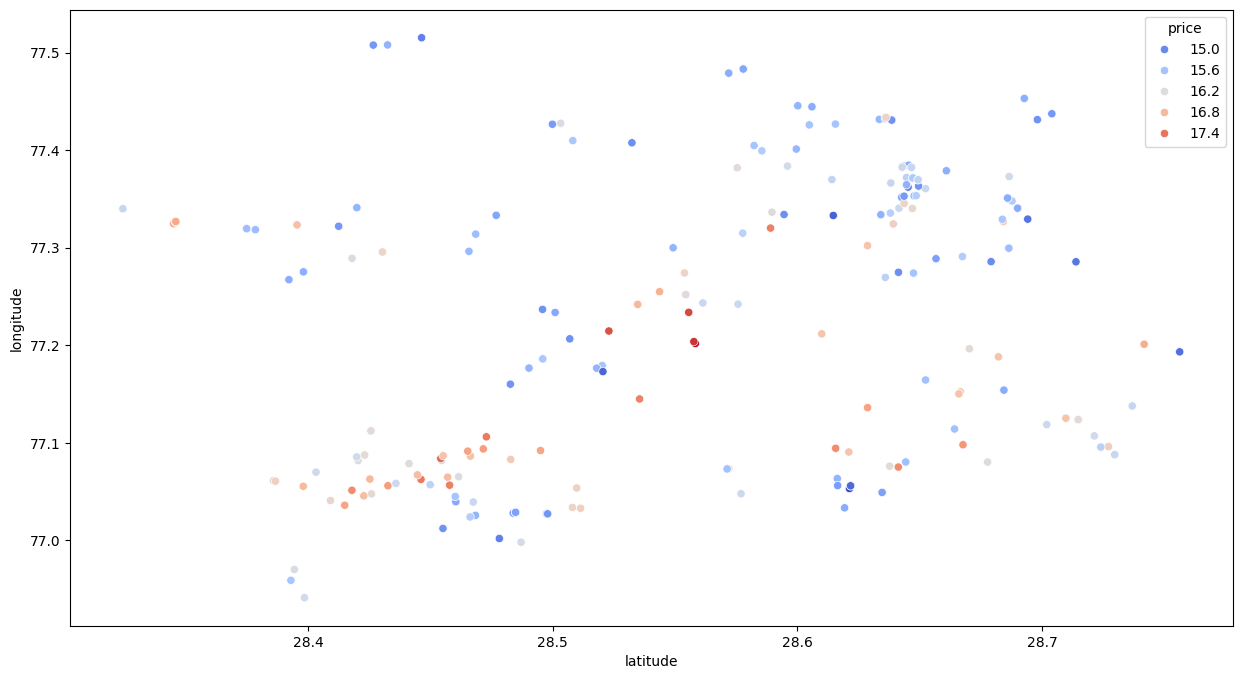

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='price',palette='coolwarm')

In [ ]:
from sklearn.linear_model import LinearRegression
x_train,y_train=train_data.drop('price',axis=1),train_data['price']
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
Y_pred=model.predict(x_train)
print(mean_absolute_percentage_error(y_train, Y_pred))


3.667436569446363e-06


In [ ]:
#R² (R-squared) score, which is a statistical measure of how well the regression predictions approximate the real data points.
model.score(x_train,y_train)

0.9999999880577035

In [ ]:
print(x_train.shape)

(263, 18)


In [ ]:
print(x_train.columns)

Index(['Unnamed: 0', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'parking', 'Lift', 'Price_sqft', 'Furnished',
       'Semi-Furnished', 'Unfurnished', 'Flat', 'Individual House',
       'Ready to Move', 'New Property', 'Resale'],
      dtype='object')


In [ ]:
input_features = [[0,0.723, 31, 78,2,3,1,1,1,8.92,1,0,0,1,1,1,1,0]]

In [ ]:
predicted_price_log = model.predict(input_features)
predicted_price = np.exp(predicted_price_log) - 1  # Reverse log transformation
round_off = round(predicted_price[0],3)
print(f"Predicted property price: rs{round_off} price per sqft ")

Predicted property price: rs15314.752 price per sqft 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
